
# Análisis Exploratorio de Datos (EDA) para los Datos de spotify_dataset

Este notebook realiza un análisis exploratorio de datos sobre la tabla `spotify_dataset`  extraída de una base de datos MySQL. Exploraremos la distribución de los datos, identificaremos patrones clave y visualizaremos relaciones importantes en los datos.


In [ ]:
# librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import mysql.connector

Informacion sobre el dataset

In [7]:
# Importar la librería pandas
import pandas as pd

# Definir el archivo CSV
csv_file_path = '../Data/spotify_dataset.csv'

# Cargar los datos
df = pd.read_csv(csv_file_path)

# Mostrar la información general del dataset
print("Información del dataset:")
df.info()

# Mostrar las primeras 5 filas del dataset
print("\nPrimeras 5 filas del dataset:")
print(df.head())



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64


Buscar datos nulos

In [8]:
# Buscar valores nulos en cada columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())



Cantidad de valores nulos por columna:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Rellenar valores nulos con valor predeterminado 

In [10]:
# Rellenar los valores nulos con "desconocido"
df_filled = df.fillna({
    'artists': 'desconocido',
    'album_name': 'desconocido',
    'track_name': 'desconocido'
})

# Verificar que los valores nulos hayan sido reemplazados
print("Valores nulos después de rellenar:")
print(df_filled.isnull().sum())


Valores nulos después de rellenar:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Buscar datos duplicados


In [20]:
valoresDuplicados = df.duplicated().sum()
print(valoresDuplicados)

0


buscar valores atipicos

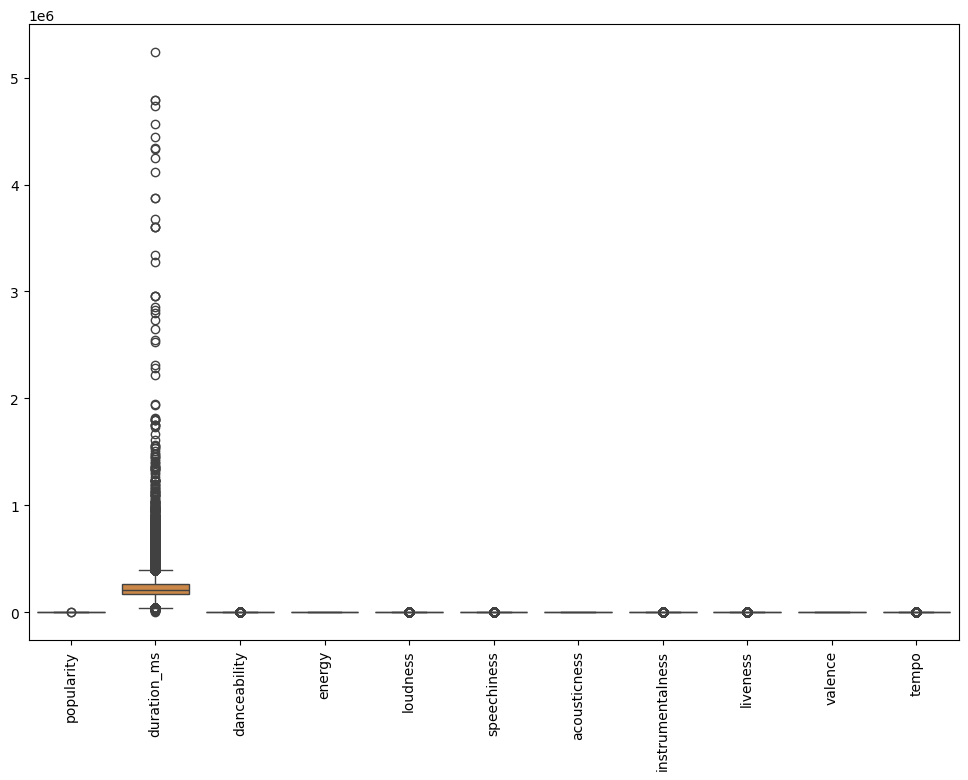

In [21]:
# Crear un boxplot para visualizar los outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])
plt.xticks(rotation=90)
plt.show()


verificar datos incoherentes

In [22]:
# Verificar si hay valores incoherentes
incoherencias = df[(df['popularity'] < 0) | (df['popularity'] > 100) | 
                   (df['duration_ms'] <= 0) | (df['danceability'] < 0) | 
                   (df['danceability'] > 1) | (df['energy'] < 0) | (df['energy'] > 1)]
                   
# Mostrar las incoherencias encontradas
incoherencias


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Imputar valores faltantes de los datos incoherentes

In [24]:
# Aplicar el relleno de valores faltantes con 'desconocido' en las columnas especificadas
df['artists'] = df['artists'].fillna('desconocido')
df['album_name'] = df['album_name'].fillna('desconocido')
df['track_name'] = df['track_name'].fillna('desconocido')

# Verificar si quedan valores nulos en esas columnas
nulos_verificados = df[['artists', 'album_name', 'track_name']].isnull().sum()

nulos_verificados


artists       0
album_name    0
track_name    0
dtype: int64

### graficas

Distribución de popularidad

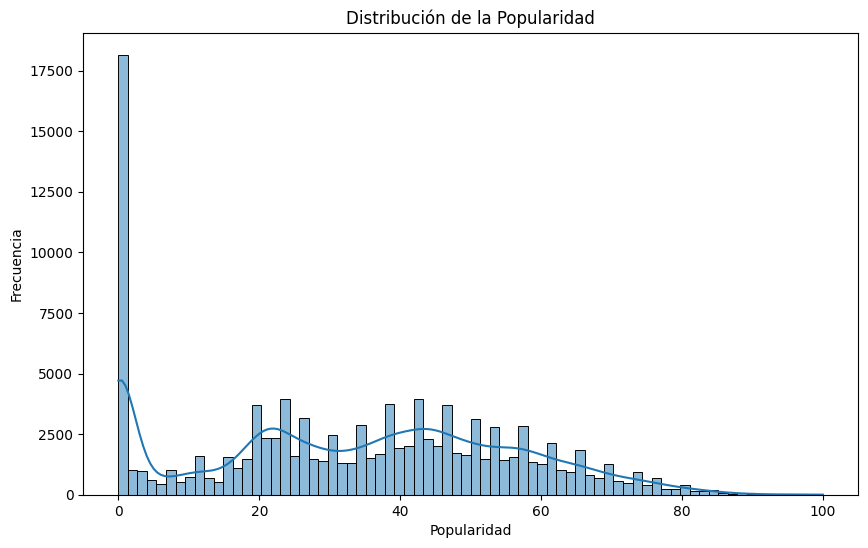

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True)
plt.title('Distribución de la Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()


Popularidad vs. Duración

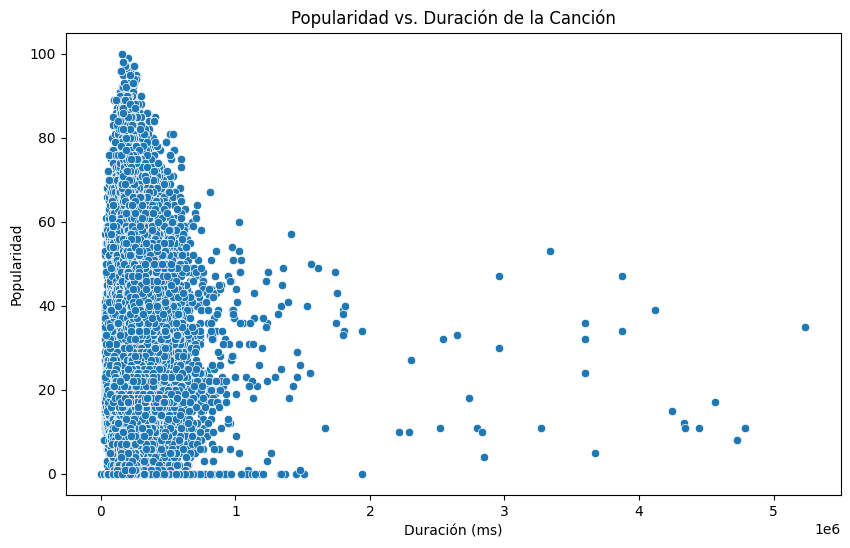

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_ms', y='popularity', data=df)
plt.title('Popularidad vs. Duración de la Canción')
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.show()


Top 10 géneros más comunes

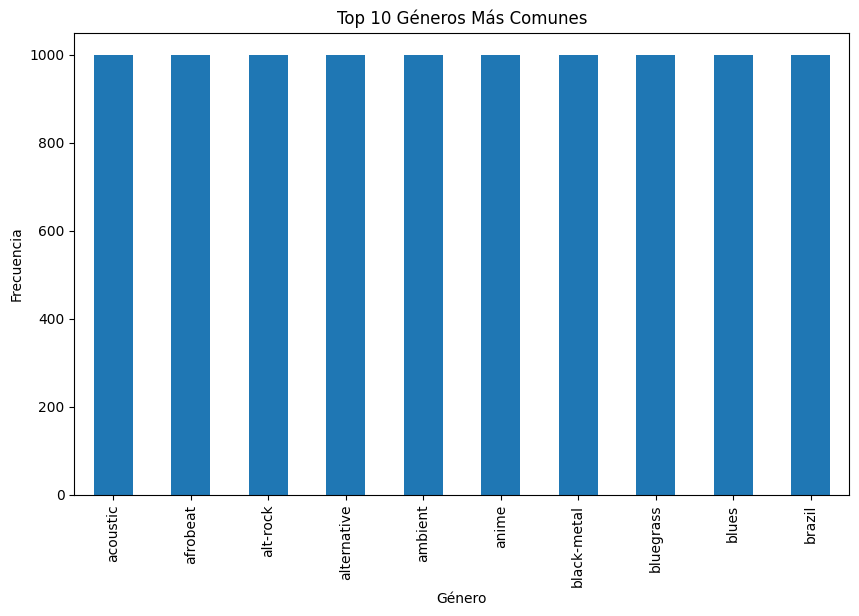

In [27]:
plt.figure(figsize=(10, 6))
df['track_genre'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Géneros Más Comunes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


Top 10 géneros más populares

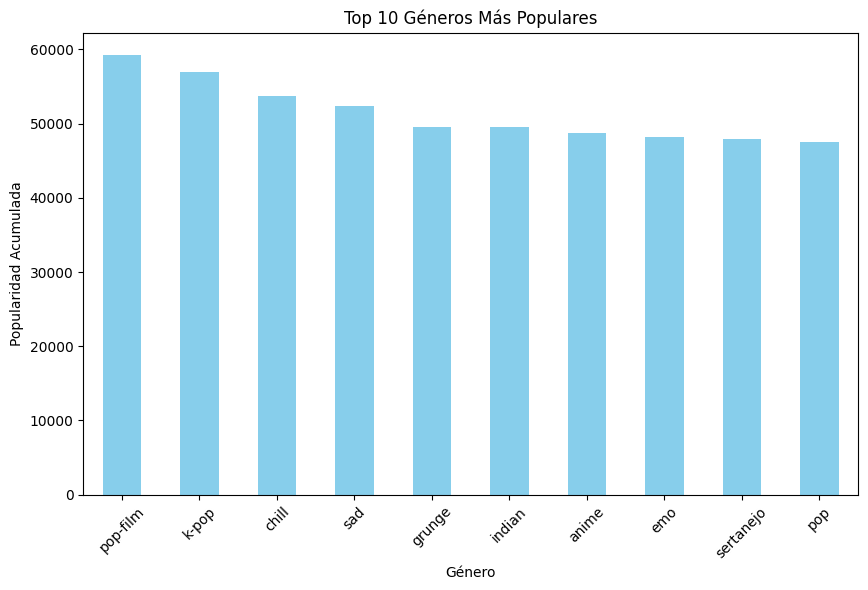

In [28]:
# Agrupar por género y sumar la popularidad de cada género
top_genres = df.groupby('track_genre')['popularity'].sum().sort_values(ascending=False).head(10)

# Graficar el Top 10 de géneros más populares
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Géneros Más Populares')
plt.xlabel('Género')
plt.ylabel('Popularidad Acumulada')
plt.xticks(rotation=45)
plt.show()


Distribución de la energía

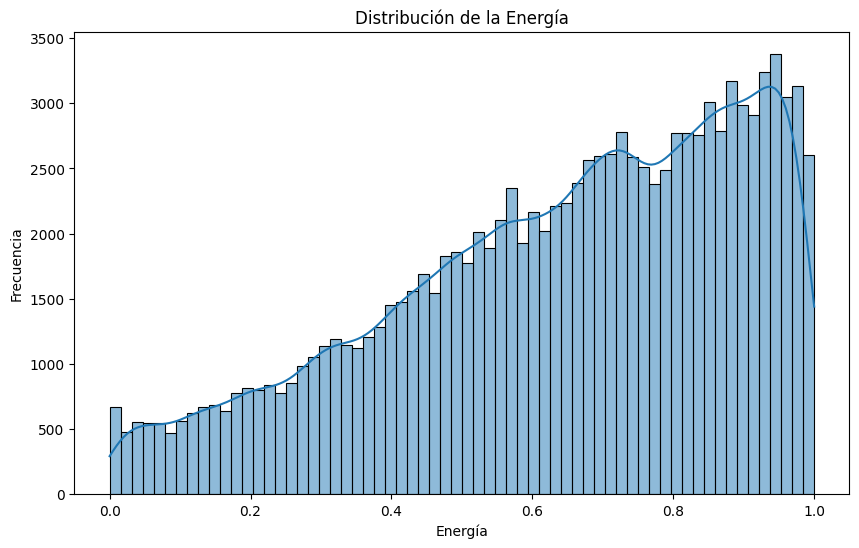

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['energy'], kde=True)
plt.title('Distribución de la Energía')
plt.xlabel('Energía')
plt.ylabel('Frecuencia')
plt.show()


Relación entre Danceabilidad y energía:

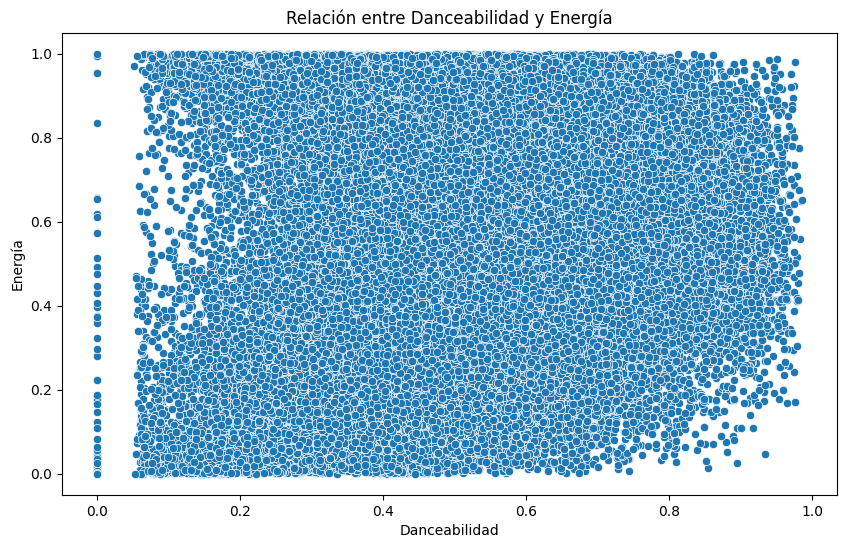

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', data=df)
plt.title('Relación entre Danceabilidad y Energía')
plt.xlabel('Danceabilidad')
plt.ylabel('Energía')
plt.show()



## conclusiones

El análisis comienza con la carga y limpieza de los datos, eliminando valores nulos y verificando tipos de datos. Esto asegura que el dataset esté en un estado adecuado para el análisis.

### Distribuciones de variables

Se utilizan histogramas para analizar la distribución de variables clave como "energy" y "danceability". El histograma de **"energy"** muestra cómo se distribuyen los niveles de energía en las canciones, lo que ayuda a identificar si el dataset está compuesto principalmente por canciones enérgicas o no. Del mismo modo, el histograma de **"danceability"** revela qué tan adecuadas son las canciones para bailar, permitiendo observar si predominan canciones muy bailables o no.

### Correlaciones entre variables

El **mapa de calor (heatmap)** de la matriz de correlación visualiza las relaciones entre las variables numéricas del dataset. Utilizando una escala de colores, este gráfico facilita la identificación de correlaciones fuertes o débiles entre atributos como "energy", "danceability", y "valence". Esto permite descubrir relaciones significativas, por ejemplo, si las canciones más bailables tienden a ser más enérgicas o si las más acústicas tienden a ser menos dinámicas.

### Relaciones entre pares de variables

El **gráfico de dispersión** entre **"danceability"** y **"energy"** explora la relación entre estas dos variables. Cada punto en el gráfico representa una canción, y la posición del punto se basa en sus valores de "danceability" (eje X) y "energy" (eje Y). Este gráfico es útil para identificar patrones de correlación entre la capacidad de baile y la energía de las canciones. Si los puntos se agrupan en una dirección ascendente, sugiere una relación positiva entre ambas variables, lo que indica que canciones más enérgicas tienden a ser más bailables.

### Conclusión general

El EDA proporciona una visión detallada de cómo las características musicales se distribuyen y se relacionan en el dataset de Spotify. Los histogramas permiten observar la distribución de variables individuales, mientras que el heatmap y los gráficos de dispersión ayudan a identificar correlaciones y relaciones entre las distintas características musicales. Esto prepara el terreno para futuros análisis o la construcción de modelos predictivos que aprovechen estas relaciones.
